In [140]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')
df

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0000,46.13
1,2012-01-01 01:00:00,4752.1,0.0000,45.89
2,2012-01-01 02:00:00,4542.6,0.0000,45.04
3,2012-01-01 03:00:00,4357.7,0.0000,45.03
4,2012-01-01 04:00:00,4275.5,0.0000,42.61
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


In [141]:
df=df[0:20000]
df

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61
...,...,...,...,...
19995,2014-04-13 06:00:00,4051.1,0.0,52.33
19996,2014-04-13 07:00:00,4222.3,0.0,52.74
19997,2014-04-13 08:00:00,4503.3,0.0,54.20
19998,2014-04-13 09:00:00,4766.2,0.0,56.59


In [142]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
# dropping null value columns to avoid errors
df.dropna(inplace = True)
  
df

<ipython-input-142-c679473efd5c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-142-c679473efd5c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61
...,...,...,...,...
19995,2014-04-13 06:00:00,4051.1,0.0,52.33
19996,2014-04-13 07:00:00,4222.3,0.0,52.74
19997,2014-04-13 08:00:00,4503.3,0.0,54.20
19998,2014-04-13 09:00:00,4766.2,0.0,56.59


In [145]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  20000 non-null  datetime64[ns]
 1   demand     20000 non-null  float64       
 2   precip     20000 non-null  float64       
 3   temp       20000 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 781.2 KB


In [146]:
fig = px.line(df, x='timeStamp', y='demand', hover_data=['temp'], title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [147]:
ny_df=df.set_index('timeStamp')

ny_df

,demand,precip,temp
timeStamp,,,
2012-01-01 00:00:00,4937.5,0.0,46.13
2012-01-01 01:00:00,4752.1,0.0,45.89
2012-01-01 02:00:00,4542.6,0.0,45.04
2012-01-01 03:00:00,4357.7,0.0,45.03
2012-01-01 04:00:00,4275.5,0.0,42.61
...,...,...,...
2014-04-13 06:00:00,4051.1,0.0,52.33
2014-04-13 07:00:00,4222.3,0.0,52.74
2014-04-13 08:00:00,4503.3,0.0,54.20


array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

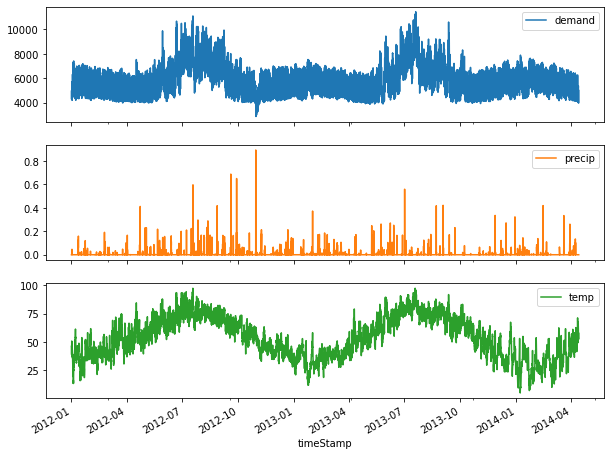

In [148]:
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


ny_df.plot(subplots=True)


In [149]:
ny_df.resample('D').mean()           ##########  takes each date and finds all the mean on that date............for 3 column


,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2014-04-09,5462.366667,0.000000,51.165000
2014-04-10,5453.679167,0.000000,49.644167
2014-04-11,5460.500000,0.000000,60.301250


array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

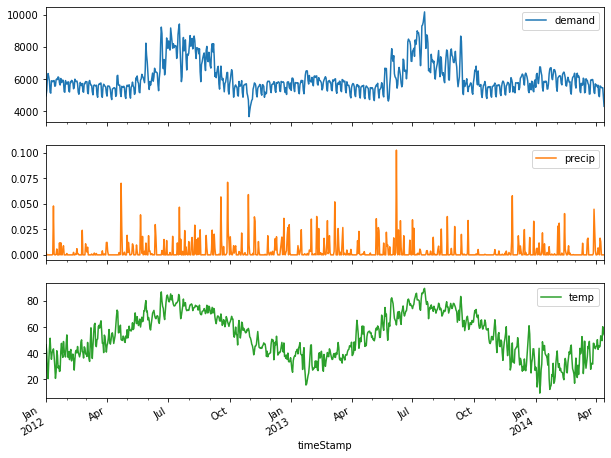

In [150]:
ny_df.resample('D').mean().plot(subplots=True)


In [151]:
ny_df_daily=ny_df.resample('D').mean()
ny_df_daily

,demand,precip,temp
timeStamp,,,
2012-01-01,4954.833333,0.002487,46.510000
2012-01-02,5302.954167,0.000000,40.496667
2012-01-03,6095.512500,0.000000,26.672500
2012-01-04,6336.266667,0.000000,20.585000
2012-01-05,6130.245833,0.000000,33.577500
...,...,...,...
2014-04-09,5462.366667,0.000000,51.165000
2014-04-10,5453.679167,0.000000,49.644167
2014-04-11,5460.500000,0.000000,60.301250


In [152]:
from fbprophet import Prophet
ny_df_final=ny_df_daily.reset_index()[['timeStamp','demand','temp']]
ny_df_final

,timeStamp,demand,temp
0,2012-01-01,4954.833333,46.510000
1,2012-01-02,5302.954167,40.496667
2,2012-01-03,6095.512500,26.672500
3,2012-01-04,6336.266667,20.585000
4,2012-01-05,6130.245833,33.577500
...,...,...,...
829,2014-04-09,5462.366667,51.165000
830,2014-04-10,5453.679167,49.644167
831,2014-04-11,5460.500000,60.301250
832,2014-04-12,4876.600000,57.984167


In [153]:
from fbprophet import Prophet
ny_df_final=ny_df_daily.reset_index()[['timeStamp','demand','temp']]
ny_df_final

,timeStamp,demand,temp
0,2012-01-01,4954.833333,46.510000
1,2012-01-02,5302.954167,40.496667
2,2012-01-03,6095.512500,26.672500
3,2012-01-04,6336.266667,20.585000
4,2012-01-05,6130.245833,33.577500
...,...,...,...
829,2014-04-09,5462.366667,51.165000
830,2014-04-10,5453.679167,49.644167
831,2014-04-11,5460.500000,60.301250
832,2014-04-12,4876.600000,57.984167


In [154]:
ny_df_final=ny_df_daily.reset_index()[['timeStamp','demand','temp']].rename({'timeStamp':'ds','demand':'y','temp':'temp'}, axis='columns')

ny_df_final

,ds,y,temp
0,2012-01-01,4954.833333,46.510000
1,2012-01-02,5302.954167,40.496667
2,2012-01-03,6095.512500,26.672500
3,2012-01-04,6336.266667,20.585000
4,2012-01-05,6130.245833,33.577500
...,...,...,...
829,2014-04-09,5462.366667,51.165000
830,2014-04-10,5453.679167,49.644167
831,2014-04-11,5460.500000,60.301250
832,2014-04-12,4876.600000,57.984167


In [155]:
ny_df_final['month']=ny_df_final['ds'].dt.month
ny_df_final

,ds,y,temp,month
0,2012-01-01,4954.833333,46.510000,1
1,2012-01-02,5302.954167,40.496667,1
2,2012-01-03,6095.512500,26.672500,1
3,2012-01-04,6336.266667,20.585000,1
4,2012-01-05,6130.245833,33.577500,1
...,...,...,...,...
829,2014-04-09,5462.366667,51.165000,4
830,2014-04-10,5453.679167,49.644167,4
831,2014-04-11,5460.500000,60.301250,4
832,2014-04-12,4876.600000,57.984167,4


In [158]:
fig = px.line(ny_df_final, x='ds', y='y', hover_data=['temp','month'], title='NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [157]:
ny_df_final[['month','temp']].groupby('month').agg({'temp':{'max','min','mean'}})      


temp                      
             min       mean        max
month                                 
1       9.507917  33.462648  51.497917
2      17.072500  35.303926  54.010833
3      21.417083  41.909809  64.810417
4      38.235833  52.322963  72.992083
5      49.514583  62.392366  82.398333
6      57.796667  71.282701  86.916667
7      66.417083  78.645397  89.606667
8      68.395417  74.029980  79.385417
9      57.274583  67.227403  83.461667
10     46.331250  59.376566  73.479583
11     27.172500  45.131486  65.596667
12     24.912083  40.032345  61.027083

In [159]:
ny_df_final.groupby('month').agg({'temp':{'max','min','mean'}})    ####### see temperature for these 6 months

temp                      
             min       mean        max
month                                 
1       9.507917  33.462648  51.497917
2      17.072500  35.303926  54.010833
3      21.417083  41.909809  64.810417
4      38.235833  52.322963  72.992083
5      49.514583  62.392366  82.398333
6      57.796667  71.282701  86.916667
7      66.417083  78.645397  89.606667
8      68.395417  74.029980  79.385417
9      57.274583  67.227403  83.461667
10     46.331250  59.376566  73.479583
11     27.172500  45.131486  65.596667
12     24.912083  40.032345  61.027083

In [160]:
ny_df_final.groupby('month').agg({'y':{'max','min','mean'}})    ####### see temperature for these 6 months

y                           
               min         mean           max
month                                        
1      4954.833333  5878.884140   6752.879167
2      5052.441667  5797.860049   6428.704167
3      4828.125000  5593.046381   6355.504167
4      4302.954545  5354.740759   6225.758333
5      4630.454167  5737.460954   8223.062500
6      5272.137500  6691.187569   9219.370833
7      5835.862500  8018.143750  10163.279167
8      5769.629167  7247.837298   8693.012500
9      5031.779167  6282.413889   8661.129167
10     3663.095833  5512.953293   6797.987500
11     4301.783333  5426.379722   6080.620833
12     5037.462500  5676.908132   6364.020833

In [161]:
ny_df_final[['y','temp']].corr()
#########33 not that much strong correlation

,y,temp
y,1.000000,0.559652
temp,0.559652,1.000000


In [162]:
ny_df_final.query('temp > 80')[['y','temp']].corr()               ########## see demand when temperature is greatre than 80


,y,temp
y,1.000000,0.658918
temp,0.658918,1.000000


In [163]:
ny_df_final.query('temp <= 80')[['y','temp']].corr()
######### not much correlated  ##########

,y,temp
y,1.00000,0.45753
temp,0.45753,1.00000


In [164]:
def summer_temp(temp):
  if temp > 80:
    return 1
  else:
    return 0

In [165]:
ny_df_final['summer_temp']=ny_df_final['temp'].apply(summer_temp)
ny_df_final

,ds,y,temp,month,summer_temp
0,2012-01-01,4954.833333,46.510000,1,0
1,2012-01-02,5302.954167,40.496667,1,0
2,2012-01-03,6095.512500,26.672500,1,0
3,2012-01-04,6336.266667,20.585000,1,0
4,2012-01-05,6130.245833,33.577500,1,0
...,...,...,...,...,...
829,2014-04-09,5462.366667,51.165000,4,0
830,2014-04-10,5453.679167,49.644167,4,0
831,2014-04-11,5460.500000,60.301250,4,0
832,2014-04-12,4876.600000,57.984167,4,0


In [166]:
ny_df_final['month_bins']=pd.cut(ny_df_final['month'],bins=3, labels=False)

#############33  IF WE HAVE 12 MONTHS IT WILL CUT DOWN 1-4 1ST BIN, 4-8 2ND BIN AND 9-12 3RD BIN



In [114]:
ny_df_final


,ds,y,temp,month,summer_temp
0,2012-01-01,4954.833333,46.510000,1,0
1,2012-01-02,5302.954167,40.496667,1,0
2,2012-01-03,6095.512500,26.672500,1,0
3,2012-01-04,6336.266667,20.585000,1,0
4,2012-01-05,6130.245833,33.577500,1,0
...,...,...,...,...,...
162,2012-06-11,6665.283333,69.060833,6,0
163,2012-06-12,6504.704167,67.076250,6,0
164,2012-06-13,6412.675000,66.414167,6,0
165,2012-06-14,6410.641667,68.106667,6,0


In [167]:
train=ny_df_final[(ny_df_final['ds'] >= '2012-01-01') & (ny_df_final['ds'] <= '2017-04-30')]
test=ny_df_final[(ny_df_final['ds'] > '2017-04-30')]

In [168]:
m = Prophet(interval_width=0.95,yearly_seasonality=True)       #######interval_width== CONFIDENCE INTERVAL 
                                                                      #######3 DEFAULT ITS 80%
                         
###########  FB PROPHET CAN ONLY TAKE DS & Y COLUMNS... SO TO ADD ANOTHER COLUMN WE USE ADD.REGRESSOR METHOD

In [ ]:
m.add_regressor('summer_temp',standardize=False)               ######## MAKE STANDARDIZE FALSE
m.add_regressor('month_bins',standardize=False,mode='multiplicative')           ##########WHEN WE HAVE INTERATCION, WE USE MULTIPLICATVE AND NOT ADDITIVE, BY DEFAULT ITS ADDITIVE

In [169]:
m.fit(train)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [170]:
m.params


{'k': array([[0.04975574]]),
 'm': array([[0.5907698]]),
 'delta': array([[ 1.93064620e-08, -7.22002639e-09, -2.41503688e-07,
         -8.51334376e-06, -1.95845027e-07, -5.68549068e-06,
         -1.68976205e-05, -3.94546991e-02, -3.23370957e-02,
         -1.01457254e-07,  4.31935334e-08, -4.97795631e-10,
          1.98129936e-08,  4.30189753e-08,  1.10231305e-07,
         -5.87236461e-09,  5.19109958e-08,  2.11511183e-07,
          3.53737830e-07,  8.56787475e-04,  1.62204063e-02,
          5.94924772e-02,  2.53011005e-02, -5.04173090e-08,
         -1.71868822e-07]]),
 'sigma_obs': array([[0.04249553]]),
 'beta': array([[-3.00538347e-02, -7.81707446e-02,  5.26625639e-02,
          5.68766450e-02, -1.42825186e-02, -1.21403925e-02,
         -6.57749821e-05,  7.84253260e-03, -3.55963311e-03,
         -1.22473408e-02,  7.91728151e-03,  6.44465945e-03,
         -1.02023124e-02, -1.06512530e-02,  1.35812164e-02,
          2.16952633e-03, -7.53836788e-03, -4.30546812e-04,
         -1.66419353

In [171]:
future = m.make_future_dataframe(periods=104)
future.tail()

,ds
933,2014-07-22
934,2014-07-23
935,2014-07-24
936,2014-07-25
937,2014-07-26


In [174]:
future['summer_temp'] = ny_df_final['summer_temp']             ############ we will add the other two column in future predictions
future['month_bins'] = ny_df_final['month_bins']


In [175]:
future

,ds,summer_temp,month_bins
0,2012-01-01,0.0,0.0
1,2012-01-02,0.0,0.0
2,2012-01-03,0.0,0.0
3,2012-01-04,0.0,0.0
4,2012-01-05,0.0,0.0
...,...,...,...
933,2014-07-22,NaN,NaN
934,2014-07-23,NaN,NaN
935,2014-07-24,NaN,NaN
936,2014-07-25,NaN,NaN


In [176]:
forecast = m.predict(future)


In [177]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
933,2014-07-22,8499.914144,7632.788942,9314.425644
934,2014-07-23,8459.386637,7699.325119,9305.002523
935,2014-07-24,8395.943418,7576.466700,9183.513043
936,2014-07-25,8295.688949,7460.179297,9117.973818
937,2014-07-26,7623.357165,6824.929271,8401.956941


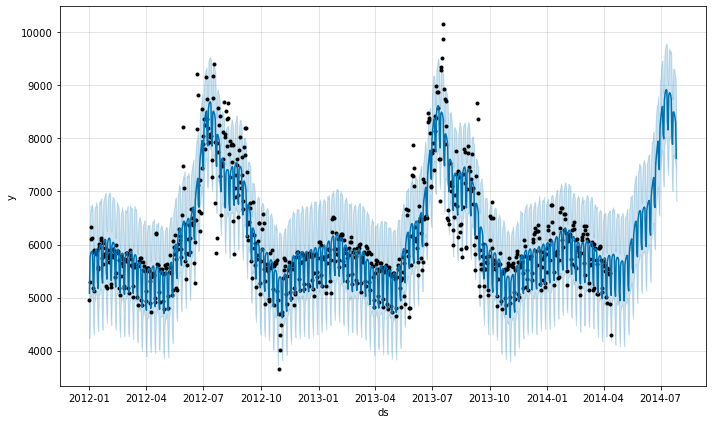

In [178]:
fig1 = m.plot(forecast)


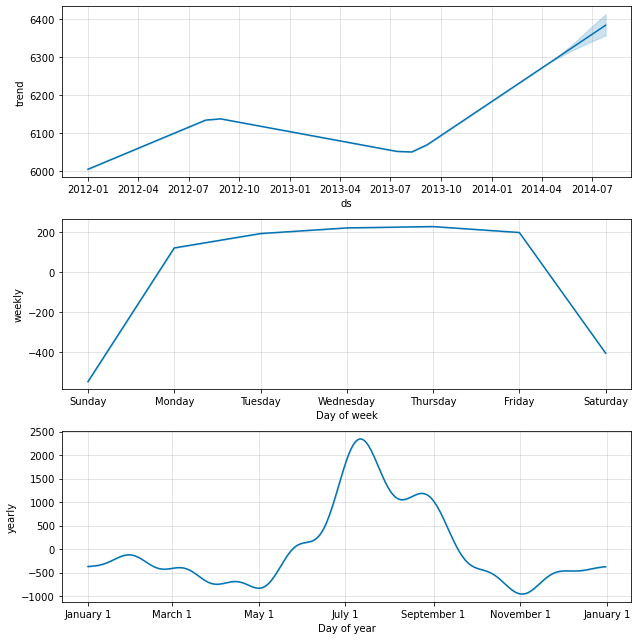

In [179]:
fig2 = m.plot_components(forecast)


In [180]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '731 days', horizon = '365 days')
df_p = performance_metrics(cv_results)
df_p

ValueError: Less data than horizon after initial window. Make horizon or initial shorter.

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')

In [ ]:
https://www.youtube.com/watch?v=XZhPO043lqU&t=383s
    
    
https://github.com/srivatsan88/End-to-End-Time-Series/blob/master/Time_Series_using_Prophet_for_Multivariate.ipynb    